# Chapter 3.6. MNIST on TensorFlow

Original code in Nikolenko book was made in **TensorFlow 1.x (TF1)**, but here I will convert examples to **TensorFlow 2.0 (TF2)**.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from models_classes import LogRegModel
from losses import cross_entropy_loss
from metrics import accuracy

## 1. Load data and visualize some examples

- MNIST have 70k images (1 channel) with size of 28x28 (784 if flatten). 
- Samples have already splitted into train (60k images) and test (10k images). 
- Target classes in categorical view

In [2]:
mnist = tf.keras.datasets.mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist
X_train, X_test = X_train / 255.0, X_test / 255.0

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Visualization:

In [3]:
def show_images(data,
                data_labels,
                random_sample=True,
                seed=42,
                sample_size=20,
                num_cols=4,
                image_ids=None):
    """
    Show images from dataset.
    
    Parameters:
        :param data: numpy array with mnist digits
        :param data_labels: numpy array with mnist labels
        :param random_sample: bool, show random pictures or not
        :param sample_size: int, how many pictures to select randomly
        :param image_ids: list, image ids if `random_sample` = False
        :param seed: int, seed for random image taking
    """
    if random_sample:
        np.random.seed(seed)
        image_ids = np.random.choice(list(range(len(data))), sample_size)
    else:
        if image_ids is None:
            raise ValueError('Provide "image_ids" list')
    
    image_ids_num = len(image_ids)
    num_rows = int(np.ceil(image_ids_num/num_cols))
    
    fig, ax = plt.subplots(figsize=(2 * num_cols, 2 * num_rows), ncols=num_cols, nrows=num_rows)
    for ind, img_id in enumerate(image_ids):
        img = data[img_id]
        
        col_ind = ind%num_cols
        row_ind = int(np.floor(ind/num_cols))
        
        if image_ids_num > num_cols: # if row num more than 1
            ax[row_ind, col_ind].set_title('Class=' + str(data_labels[img_id]))
            ax[row_ind, col_ind].imshow(img)
        else: # if only 1 row
            ax[ind].set_title('Class=' + str(data_labels[img_id]))
            ax[ind].imshow(img)
            
    plt.tight_layout()  
    plt.show()

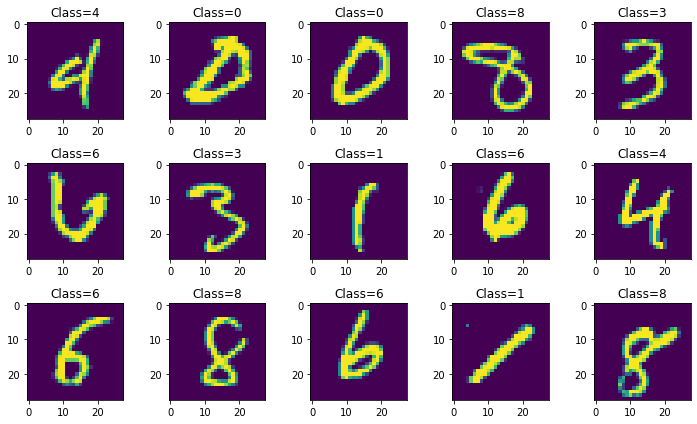

In [4]:
show_images(X_train, y_train, random_sample=True, seed=42, sample_size=15, num_cols=5)

## 2. Create and train logistic regression using TF2

- Set constats
- Define train process
- Initialize weigts
- Set model and optimier
- Loop over epochs

In [23]:
# set constants
batch_size = 128
num_steps = 2000
display_step = 100

# define train proces
def train(model, X, y, optimizer):
    """
    One step of train process
    
    params:
        model: model object ot train
        X: data
        y: target 
        optimizer: tf optimizer
    return:
        loss_val: loss value
    """
    with tf.GradientTape() as t:
        y_pred = tf.nn.softmax(model(X))
        loss_val = cross_entropy_loss(y, y_pred)
        
    grads = t.gradient(loss_val, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    acc = accuracy(y, y_pred)
    
    return loss_val, acc

# Initialize weigts 
W = tf.Variable(tf.random.normal([784, 10], dtype='float32'), name='weights')
b = tf.Variable(tf.zeros([10], dtype='float32'), name='biases')

# Set up model and optimier
model = LogRegModel(W, b)
optimizer = tf.optimizers.Adam(learning_rate=1e-2)

In [24]:
np.random.seed(42)

# running optimization
for i in range(num_steps):
    
    # select data batch
    indices = np.random.choice(len(X_train), batch_size)
    X_batch, y_batch = X_train[indices], y_train[indices]
    
    # Flatten data and make ohe over target
    X_batch_flat = tf.cast(X_batch.reshape(batch_size, 784), tf.float32)
    y_batch_ohe = tf.cast(tf.one_hot(y_batch, 10), tf.float32)
    
    # train model
    loss_val, acc_val = train(model, X_batch_flat, y_batch_ohe, optimizer)
    
    # evaluate model
    
    
    # output info
    if (i+1) % display_step == 0:
        print(f'Epoch {i+1}: loss={loss_val.numpy()}, accuracy={acc_val}')

Epoch 100: loss=-0.4451006054878235, accuracy=0.6484375
Epoch 200: loss=-0.459831178188324, accuracy=0.65625
Epoch 300: loss=-0.584585428237915, accuracy=0.859375
Epoch 400: loss=-0.5484375953674316, accuracy=0.7890625
Epoch 500: loss=-0.5284705758094788, accuracy=0.765625
Epoch 600: loss=-0.5838673114776611, accuracy=0.8359375
Epoch 700: loss=-0.5368525981903076, accuracy=0.78125
Epoch 800: loss=-0.5733637809753418, accuracy=0.828125
Epoch 900: loss=-0.5608506202697754, accuracy=0.8046875
Epoch 1000: loss=-0.5629346370697021, accuracy=0.8046875
Epoch 1100: loss=-0.5827523469924927, accuracy=0.84375
Epoch 1200: loss=-0.5849268436431885, accuracy=0.84375
Epoch 1300: loss=-0.5767043828964233, accuracy=0.8359375
Epoch 1400: loss=-0.5823259949684143, accuracy=0.8359375
Epoch 1500: loss=-0.5496864914894104, accuracy=0.796875
Epoch 1600: loss=-0.5798617005348206, accuracy=0.8359375
Epoch 1700: loss=-0.6165472269058228, accuracy=0.890625
Epoch 1800: loss=-0.5603693723678589, accuracy=0.804687